In [1]:
from appgeopy import *
from my_packages import *
from tools import *

In [2]:
h5_fpath = "20250309_MLCW_CRFP_v8.h5"
# initiate MLCW class object
mlcw_obj = MLCW(h5_fpath=h5_fpath)
mlcw_data, mlcw_metadata = mlcw_obj.get_data()
available_stations = mlcw_obj.list_stations()
available_stations[:5]

['ANHE', 'ANNAN', 'BEICHEN', 'CANLIN', 'DONGGUANG']

In [3]:
mlcw_obj.list_structure(mlcw_data)

├── ANHE
│   ├── date
│   ├── depth
│   └── values
│       ├── col_diff
│       ├── model_original
│       ├── original
│       └── ref2base
├── ANNAN
│   ├── date
│   ├── depth
│   └── values
│       ├── col_diff
│       ├── model_original
│       ├── original
│       └── ref2base
├── BEICHEN
│   ├── date
│   ├── depth
│   └── values
│       ├── col_diff
│       ├── model_original
│       ├── original
│       └── ref2base
├── CANLIN
│   ├── date
│   ├── depth
│   └── values
│       ├── col_diff
│       ├── model_original
│       ├── original
│       └── ref2base
├── DONGGUANG
│   ├── date
│   ├── depth
│   └── values
│       ├── col_diff
│       ├── model_original
│       ├── original
│       └── ref2base
├── ERLUN
│   ├── date
│   ├── depth
│   └── values
│       ├── col_diff
│       ├── model_original
│       ├── original
│       └── ref2base
├── FENGAN
│   ├── date
│   ├── depth
│   └── values
│       ├── col_diff
│       ├── model_original
│       ├── original
│       └── ref2base

  0%|          | 0/38 [00:00<?, ?it/s]

TUKU Array must not contain infs or nans.


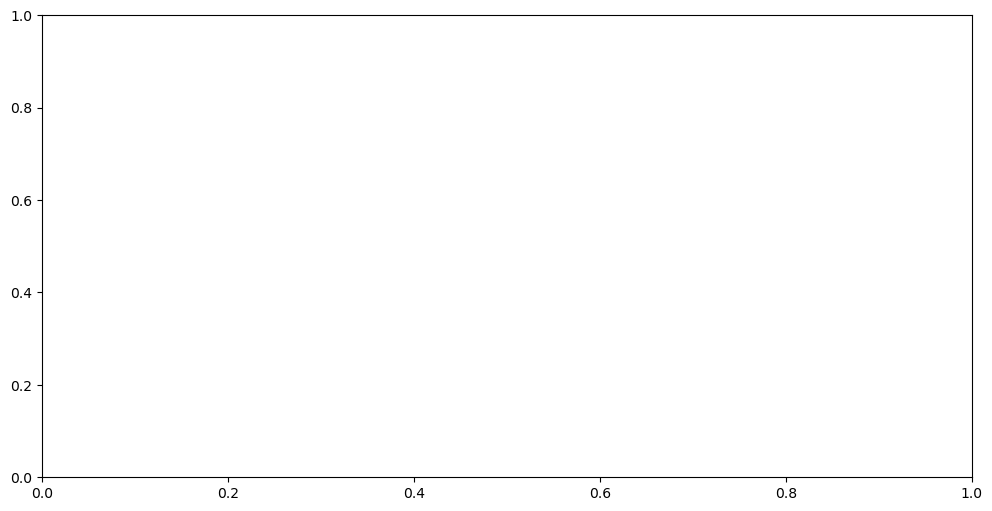

In [5]:
# select_station = available_stations[2]
for select_station in tqdm(available_stations):
    try:

        model_original_df = mlcw_obj.build_dataframe(
            station=select_station, value_type="model_original", end_date="2022"
        )

        row_differencing = model_original_df.diff(1)
        row_differencing.iloc[0, :] = model_original_df.iloc[0, :]

        row_diff_ref2first = row_differencing.subtract(row_differencing.iloc[:, 0], axis=0)
        row_diff_ref2first = row_diff_ref2first * 100  # convert to milimeter

        row_diff_ref2base = row_diff_ref2first.iloc[::-1].cumsum(axis=0)[::-1]

        fig, ax = mlcw_obj.quick_plot(df=row_diff_ref2base, station_label=select_station, figsize=(12, 6))

        visualize.save_figure(fig=fig, savepath=f"figs_checkMLCW\\{select_station}_temp.png")
        plt.close()
    except Exception as e:
        print(select_station, e)
        pass

In [ ]:
mlcw_obj.list_structure(mlcw_data)